# **Sustainability Meets Strategy: Portfolio Optimization with ESG Insights**

Data
Yahoo Finance for financial information like prices, sectors and ESG scores
Datahub for list of securities in S&P 500
https://datahub.io/core/s-and-p-500-companies#resource-constituents


Importing Libraries

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

# pd.options.display.max_columns = 50
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 0)

plt.rcParams.update({'figure.figsize':(15,3), 'figure.dpi':60})
plt.style.use('fivethirtyeight')

In [5]:
import sys
sys.path.append('../src')


In [6]:
import requests
import io
import string
import re
from pprint import pprint
from tqdm.notebook import tqdm
import io

In [7]:
snp = pd.read_csv('snp500_constituents.csv')
snp.set_index('Symbol', inplace=True)
snp.head()

,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
Symbol,,,,,,,
A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999
AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
ABNB,Airbnb,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","San Francisco, California",2023-09-18,1559720,2008
ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888


Data Extraction from Yahoo Finance
ESG Scores

In [8]:
import yfinance as yf

In [9]:
# Retrieve Yahoo! Finance Sustainability Scores for each ticker
esg_data = pd.DataFrame([])

for ticker in tqdm(snp.index):

    try:
#         print('Processing {}'.format(ticker))
        temp = yf.Ticker(ticker).sustainability.T
        temp['symbol'] = ticker

        esg_data = pd.concat([esg_data,temp])

    except Exception as e:
#         print(e)
        continue

esg_data.set_index('symbol', inplace=True)

  0%|          | 0/502 [00:00<?, ?it/s]

ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AMTM?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=AMTM&crumb=jNe3JDNJPoJ
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BF.B?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=BF.B&crumb=jNe3JDNJPoJ
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BRK.B?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=BRK.B&crumb=jNe3JDNJPoJ
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DOC?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=DOC&crumb=jNe3JDNJPoJ
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FOX?modules=esgScores&corsDomain=finance.yahoo.com&formatt

In [10]:
required_cols = ['socialScore','governanceScore','environmentScore','totalEsg',
                 'esgPerformance','percentile','peerGroup','highestControversy']

esg_data.columns.name = ''
esg_data = esg_data[required_cols]
esg_data = esg_data.apply(pd.to_numeric, errors='ignore')

In [11]:
esg_data.shape

(492, 8)

In [12]:
esg_data.sort_values('totalEsg', ascending=False).head()

,socialScore,governanceScore,environmentScore,totalEsg,esgPerformance,percentile,peerGroup,highestControversy
symbol,,,,,,,,
XOM,11.58,6.99,25.09,43.66,LEAD_PERF,NaN,Oil & Gas Producers,3.0
APA,8.26,7.12,27.69,43.08,LEAD_PERF,NaN,Oil & Gas Producers,2.0
MMM,16.82,6.51,19.53,42.86,LEAD_PERF,NaN,Industrial Conglomerates,5.0
TDG,18.35,8.06,11.89,38.30,LEAD_PERF,NaN,Aerospace & Defense,2.0
OXY,9.06,6.44,22.33,37.83,LEAD_PERF,NaN,Oil & Gas Producers,2.0


In [13]:
esg_data.to_csv('esg_scores.csv')


Security Data Collection

In [14]:
tickers = snp.index.to_list()

In [15]:
tickerinfo = []
for ticker in tqdm(tickers):
    try:
        info = yf.Ticker(ticker).info
        info['symbol'] = ticker
        tickerinfo.append(info)

    except Exception as e:
        continue

  0%|          | 0/502 [00:00<?, ?it/s]

In [16]:
security_data = pd.DataFrame(tickerinfo)
security_data.set_index('symbol', inplace=True)
security_data.shape

(502, 133)

In [17]:
security_data.to_csv('security_data.csv')


Extracting Price Information

In [19]:
start_date = '2000-01-01'
end_date = '2023-12-31'

In [20]:
data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  502 of 502 completed
ERROR:yfinance:
6 Failed downloads:
ERROR:yfinance:['AMTM', 'SW', 'GEV', 'SOLV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2000-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 946702800, endDate = 1703998800")')
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2000-01-01 -> 2023-12-31)')


In [21]:
prices = data['Adj Close'][tickers]
px = prices.loc['2015':].dropna(axis=1, how='all')
px.to_csv('prices.csv')
px.head()

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APTV,ARE,ATO,AVB,AVGO,AVY,AWK,AXON,AXP,AZO,BA,BAC,BALL,BAX,BBY,BDX,BEN,BG,BIIB,BK,BKNG,BKR,BLDR,BLK,BMY,BR,BRO,BSX,BWA,BX,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COR,COST,CPAY,CPB,CPRT,CPT,CRL,CRM,CRWD,CSCO,CSGP,CSX,CTAS,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DAY,DD,DE,DECK,DELL,DFS,DG,DGX,DHI,DHR,DIS,DLR,DLTR,DOC,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXCM,EA,EBAY,ECL,ED,EFX,EG,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ERIE,ES,ESS,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FI,FICO,FIS,FITB,FMC,FOX,FOXA,FRT,FSLR,FTNT,FTV,GD,GDDY,GE,GEHC,GEN,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,INCY,INTC,INTU,INVH,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JBL,JCI,JKHY,JNJ,JNPR,JPM,K,KDP,KEY,KEYS,KHC,KIM,KKR,KLAC,KMB,KMI,KMX,KO,KR,KVUE,L,LDOS,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNT,LOW,LRCX,LULU,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,META,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOH,MOS,MPC,MPWR,MRK,MRNA,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MU,NCLH,NDAQ,NDSN,NEE,NEM,NFLX,NI,NKE,NOC,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,NXPI,O,ODFL,OKE,OMC,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PCAR,PCG,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PLD,PLTR,PM,PNC,PNR,PNW,PODD,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,PYPL,QCOM,QRVO,RCL,REG,REGN,RF,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,RVTY,SBAC,SBUX,SCHW,SHW,SJM,SLB,SMCI,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STLD,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TECH,TEL,TER,TFC,TFX,TGT,TJX,TMO,TMUS,TPL,TPR,TRGP,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TXN,TXT,TYL,UAL,UBER,UDR,UHS,ULTA,UNH,UNP,UPS,URI,USB,V,VICI,VLO,VLTO,VMC,VRSK,VRSN,VRTX,VST,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDC,WEC,WELL,WFC,WM,WMB,WMT,WRB,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,37.422047,24.347168,43.563179,NaN,37.108749,19.496668,75.312744,72.339996,45.085964,39.133034,67.015762,59.529999,33.858215,42.813091,9.684171,24.178289,44.010120,55.318371,38.625427,63.250000,52.438370,56.200001,56.303612,49.587276,21.982441,7.229084,2.67,49.200123,121.188011,105.963089,79.896660,15.4260,3.917500,81.639999,85.419884,23.956100,51.523640,106.267899,12.179231,57.221512,65.934669,43.836670,120.295776,7.649096,42.985760,44.724041,26.510000,80.322243,616.789978,113.657227,14.532610,31.011200,33.772667,27.352043,117.900436,36.315308,69.432785,342.010010,31.478207,1132.023071,30.595396,6.75,276.776703,43.871426,38.181484,14.767584,13.22,41.514854,20.614901,90.618774,41.534023,20.435268,60.516830,NaN,70.367188,93.900581,53.085739,34.669998,53.019573,38.915905,18.830000,31.222715,48.680473,NaN,42.151840,17.480385,34.660133,57.869579,166.429993,95.857826,38.751759,54.687820,78.956573,23.096949,60.386730,13.5680,110.746170,26.239265,26.110001,16.525759,68.653290,40.064972,49.960651,78.209427,114.731621,150.259995,32.597286,4.57250,50.990604,63.880001,58.910961,NaN,20.326616,18.013000,10.227782,15.150867,22.770544,47.635868,NaN,72.580124,74.213638,4.04,50.815926,43.582138,NaN,51.194344,73.939850,14.956667,NaN,52.422726,63.139034,56.276268,22.430050,35.268482,86.310013,45.853107,70.349998,24.289383,48.351101,NaN,84.776077,39.028004,53.016445,55.819565,75.830002,42.665531,13.6275,45.789612

In [22]:
esg_data = pd.read_csv('esg_scores.csv')
security_data = pd.read_csv('security_data.csv')
px = pd.read_csv('prices.csv')
esg_data.set_index('symbol', inplace=True)
security_data.set_index('symbol', inplace=True)
px.Date = pd.to_datetime(px.Date)
px.set_index('Date', inplace=True)
px = px[px.columns[px.count() == px.count().max()]]

Defining Formulas for Exploratory Data Analytics

In [23]:
def calcRetsCov(px, freq):
    # Resample prices to the specified frequency and forward fill missing values
    px_freq = px.resample(freq).ffill()
    px_freq.index = px_freq.index.to_period(freq)

    # Calculate percentage change (returns) and drop NaNs
    rets = px_freq.pct_change().dropna()
    cov = rets.cov()  # Covariance matrix of returns
    return rets, cov

# Example usage:
rets_monthly, cov_monthly = calcRetsCov(px, 'M')

In [24]:
def summary_stats(returns, riskfree_rate=0.013, periods_per_year=12):
    ann_rets = returns.mean() * periods_per_year  # Annualized return
    ann_vol = returns.std() * (periods_per_year**0.5)  # Annualized volatility
    excess_ret = ann_rets - riskfree_rate
    sharpe_ratio = excess_ret / ann_vol  # Sharpe ratio

    return pd.DataFrame({
        'Annualized Return': ann_rets,
        'Annualized Volatility': ann_vol,
        'Sharpe Ratio': sharpe_ratio
    })

# Calculate risk data
rets_period = rets_monthly
PERIODS_PER_YEAR = 12
RISK_FREE_RATE = 0.013
risk_data = summary_stats(rets_period, riskfree_rate=RISK_FREE_RATE, periods_per_year=PERIODS_PER_YEAR)
risk_data = risk_data.sort_values('Sharpe Ratio', ascending=False)


In [25]:
full_data = (
    risk_data
    .join(esg_data, how='inner')
    .join(security_data[['marketCap']], how='inner')
    .join(snp, how='inner')
)

# Remove rows with missing totalEsg values
full_data = full_data[~full_data.totalEsg.isnull()]

# Categorize market capitalization into groups
full_data['mktcap_grp'] = pd.cut(full_data['percentile'], bins=3, labels=["Small", "Medium", "Large"])


In [26]:
largePeerGroup = esg_data['peerGroup'].value_counts().index[:20].to_list()
full_data['peerGroup2'] = full_data['peerGroup'].apply(lambda x: x if x in largePeerGroup else 'Others')


In [27]:
full_data['esg_soc_grp'] = pd.cut(full_data['socialScore'], bins=5, labels=["Severe Risk", "High Risk", "Medium Risk", "Low Risk", "No Risk"])
full_data['esg_env_grp'] = pd.cut(full_data['environmentScore'], bins=5, labels=["Severe Risk", "High Risk", "Medium Risk", "Low Risk", "No Risk"])
full_data['esg_gov_grp'] = pd.cut(full_data['governanceScore'], bins=5, labels=["Severe Risk", "High Risk", "Medium Risk", "Low Risk", "No Risk"])
full_data['esg_tot_grp'] = pd.cut(full_data['totalEsg'], bins=5, labels=["Severe Risk", "High Risk", "Medium Risk", "Low Risk", "No Risk"])


In [37]:
full_data.head()
full_data.to_csv("full_data.csv")


In [33]:
full_data.shape

(465, 25)

Pair Scatter Plots of ESG Scores

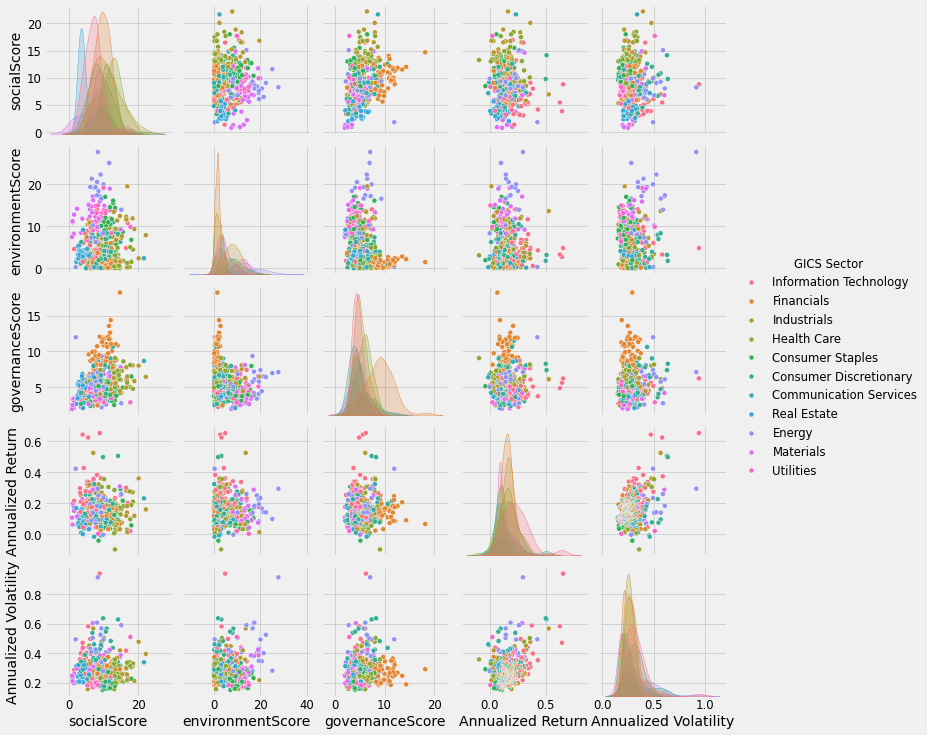

In [38]:
sns.pairplot(data = full_data[['socialScore','environmentScore','governanceScore','Annualized Return','Annualized Volatility','GICS Sector']], hue='GICS Sector')
plt.show()

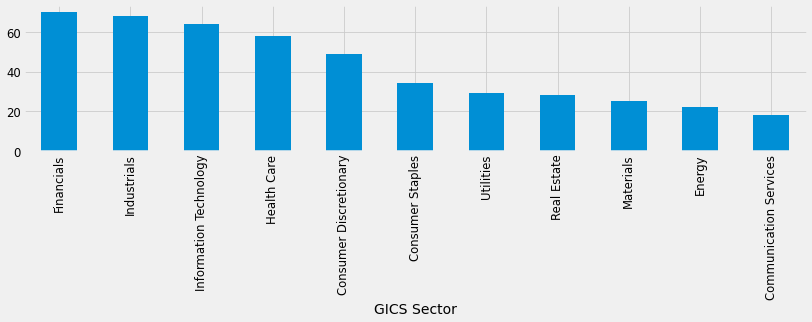

In [40]:
full_data["GICS Sector"].value_counts().plot.bar(figsize=(15,3))
plt.show()

In [42]:
print('5 sectors with most securities: {}'.format(', '.join(full_data["GICS Sector"].value_counts().head().index.to_list())))

5 sectors with most securities: Financials, Industrials, Information Technology, Health Care, Consumer Discretionary


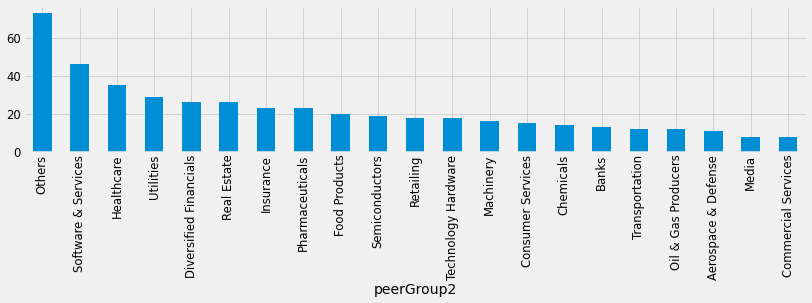

In [43]:
full_data.peerGroup2.value_counts().plot.bar(figsize=(15,3))
plt.show()

In [44]:
print('5 peerGroup with most securities: {}'.format(', '.join(full_data.peerGroup2.value_counts()[1:6].index.to_list())))

5 peerGroup with most securities: Software & Services, Healthcare, Utilities, Diversified Financials, Real Estate


In [45]:
def sorted_boxplot(data, x, y):
    grouped = data[[x,y]].groupby([x]).median().sort_values(y, ascending=False)
    ax = sns.boxplot(data=data, x=y, y=x, order=grouped.index, orient='h')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

Total ESG

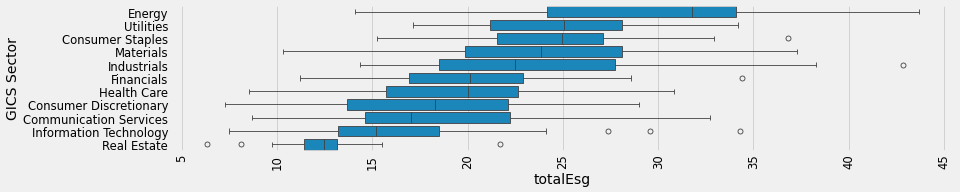

In [47]:
sorted_boxplot(full_data, 'GICS Sector', 'totalEsg')

Environment Score

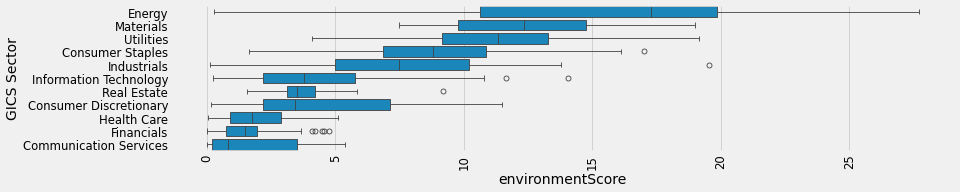

In [48]:
sorted_boxplot(full_data, 'GICS Sector', 'environmentScore')

Governance Score

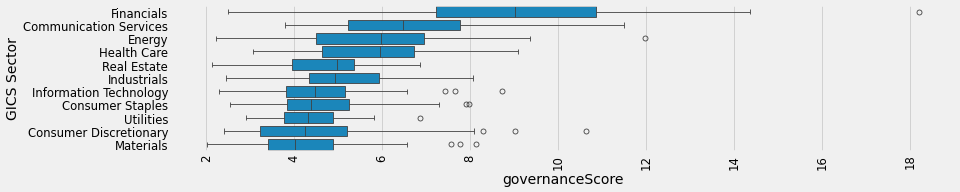

In [49]:
sorted_boxplot(full_data, 'GICS Sector', 'governanceScore')

Social Score

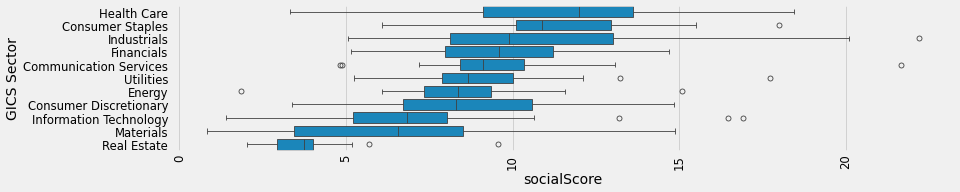

In [50]:
sorted_boxplot(full_data, 'GICS Sector', 'socialScore')

Defining Formulas for Portfolio Analysis

In [51]:
def annualize_rets(returns, periods_per_year):
    """Annualize returns given a period frequency."""
    compounded_growth = (1 + returns).prod()
    n_periods = returns.shape[0]
    return compounded_growth ** (periods_per_year / n_periods) - 1

In [52]:
def equal_weights(n):
    """Generate equal weights for n assets."""
    return np.repeat(1 / n, n)

In [53]:
def drawdown(return_series):
    """Calculate drawdown and wealth index for a series of returns."""
    wealth_index = (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Previous Peak": previous_peaks,
        "Drawdown": drawdowns
    })


In [54]:
def summary_stats(returns, riskfree_rate=0.013, periods_per_year=12):
    """Generate summary statistics for returns."""
    ann_rets = returns.mean() * periods_per_year
    ann_vol = returns.std() * (periods_per_year ** 0.5)
    sharpe_ratio = (ann_rets - riskfree_rate) / ann_vol
    return pd.DataFrame({
        "Annualized Return": ann_rets,
        "Annualized Volatility": ann_vol,
        "Sharpe Ratio": sharpe_ratio
    })


In [55]:
# Equal weights for benchmark portfolio
er_bmk = annualize_rets(rets_monthly, periods_per_year=12)
cov_bmk = rets_monthly.cov()
weights_bmk = equal_weights(len(er_bmk))
return_bmk = (weights_bmk * rets_monthly).sum(axis=1)
wealth_bmk = drawdown(return_bmk)["Wealth"]

# Initialize result dictionaries
return_port = {"bmk": return_bmk}
wealth_port = {"bmk": wealth_bmk}


**Portfolio Analysis**

An equally weighted portfolio comprising securities from all industries is established as the benchmark for this analysis. The performance of portfolios, constructed using different stock selection criteria, is evaluated against this benchmark. To ensure uniformity, each portfolio consists of 20 securities selected from the overall universe.

**Stock Selection 1**

* Sector: All
* Number of Portfolios: 4
* Stock Selection Criteria: Top 30 securities ranked by social, governance, environmental, and total ESG scores.

Portfolio Names:
* socialScore
* governanceScore
* environmentScore
* totalEsg



In [56]:
score_list = ['socialScore', 'governanceScore', 'environmentScore', 'totalEsg']
num_of_stocks = 30

for score in score_list:
    # Select top stocks based on score
    stock_selected = full_data.sort_values(score, ascending=False).head(num_of_stocks).index

    # Calculate equal weights for the selected portfolio
    er_port = annualize_rets(rets_monthly[stock_selected], periods_per_year=12)
    cov_port = rets_monthly[stock_selected].cov()
    weights_port = equal_weights(len(er_port))

    # Portfolio returns and wealth
    return_ = (weights_port * rets_monthly[stock_selected]).sum(axis=1)
    wealth_ = drawdown(return_)["Wealth"]

    # Store results
    return_port[score] = return_
    wealth_port[score] = wealth_


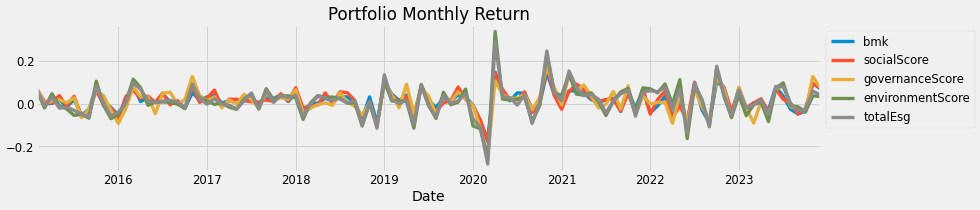

In [57]:
return_port = pd.DataFrame(return_port)
return_port.plot(title="Portfolio Monthly Return").legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


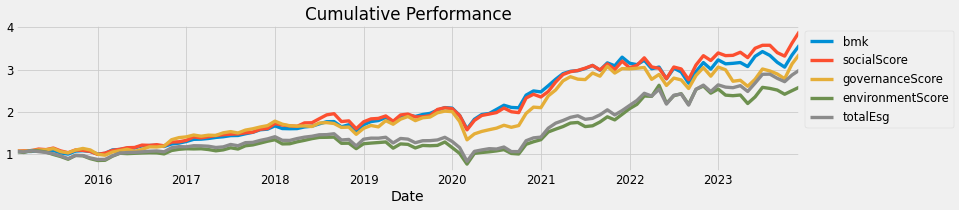

In [58]:
wealth_port = pd.DataFrame(wealth_port)
wealth_port.plot(title="Cumulative Performance").legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


In [59]:
# Generate summary statistics
summary = summary_stats(return_port, riskfree_rate=RISK_FREE_RATE, periods_per_year=PERIODS_PER_YEAR)
summary = summary.sort_values("Sharpe Ratio", ascending=False)
print(summary)

                  Annualized Return  Annualized Volatility  Sharpe Ratio
socialScore       0.170508           0.184886               0.851919    
bmk               0.158190           0.170435               0.851878    
governanceScore   0.158647           0.208054               0.700046    
totalEsg          0.153360           0.246023               0.570515    
environmentScore  0.138832           0.255769               0.491974    


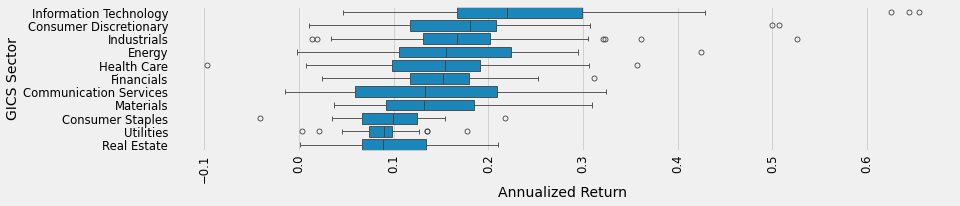

In [60]:
sorted_boxplot(full_data, 'GICS Sector', 'Annualized Return')

**Stock Selection 2**

Selecting the top 3 outperforming sectors

* Sector = 'Information Technology', 'Consumer Discretionary', 'Industrials'
* Number of portfolios = 4
* Stock selection = Top 30 securities in terms of social, governance, environment, total ESG Score

Portfolio Names:
* socialScore
* governanceScore
* environmentScore
* totalEsg

In [62]:
# Define sector and score lists
sector_list = ['Information Technology', 'Consumer Discretionary', 'Industrials']
score_list = ['socialScore', 'governanceScore', 'environmentScore', 'totalEsg']
num_of_stocks = 30

# Calculate benchmark portfolio
er_bmk = annualize_rets(rets_monthly, periods_per_year=12)
cov_bmk = rets_monthly.cov()
weights_bmk = equal_weights(len(er_bmk))

return_bmk = (weights_bmk * rets_monthly).sum(axis=1)
wealth_bmk = drawdown(return_bmk)["Wealth"]

# Initialize dictionaries for storing portfolio returns and wealth
return_port = {"bmk": return_bmk}
wealth_port = {"bmk": wealth_bmk}

# Loop through scores to create portfolios
for score in score_list:
    # Filter stocks by sectors and sort by the given score
    stock_selected = (
        full_data[full_data["GICS Sector"].isin(sector_list)]
        .sort_values(score, ascending=False)
        .head(num_of_stocks)
        .index
    )

    # Calculate portfolio returns and wealth
    er_port = annualize_rets(rets_monthly[stock_selected], periods_per_year=12)
    cov_port = rets_monthly[stock_selected].cov()
    weights_port = equal_weights(len(er_port))

    return_ = (weights_port * rets_monthly[stock_selected]).sum(axis=1)
    wealth_ = drawdown(return_)["Wealth"]

    # Store results
    return_port[score] = return_
    wealth_port[score] = wealth_


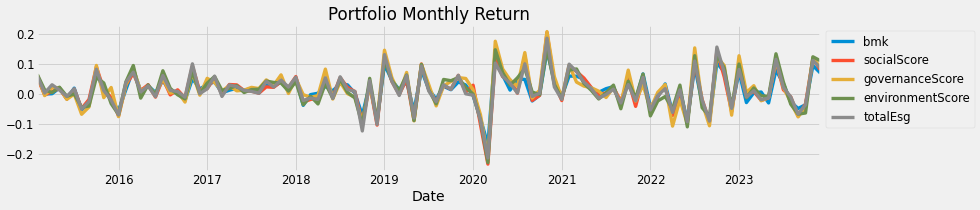

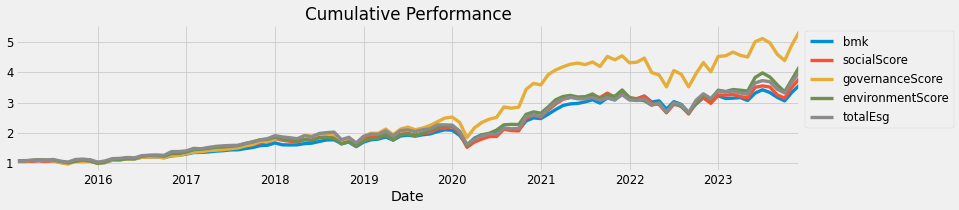

In [63]:
# Convert return and wealth data to DataFrames
return_port = pd.DataFrame(return_port)
wealth_port = pd.DataFrame(wealth_port)

# Plot portfolio monthly returns
return_port.plot(title="Portfolio Monthly Return").legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Plot cumulative performance
wealth_port.plot(title="Cumulative Performance").legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


In [64]:
# Generate summary statistics
summary = summary_stats(return_port, riskfree_rate=RISK_FREE_RATE, periods_per_year=PERIODS_PER_YEAR)
summary = summary.sort_values("Sharpe Ratio", ascending=False)
print(summary)


                  Annualized Return  Annualized Volatility  Sharpe Ratio
governanceScore   0.214058           0.222901               0.902009    
bmk               0.158190           0.170435               0.851878    
environmentScore  0.183549           0.209018               0.815956    
totalEsg          0.176905           0.202135               0.810870    
socialScore       0.172150           0.207947               0.765339    


In [66]:
print('Stocks Selected: {}'.format(', '.join(full_data.loc[stock_selected.to_list()].Security.to_list())))

Stocks Selected: 3M, TransDigm Group, Quanta Services, Boeing, Teledyne Technologies, Huntington Ingalls Industries, General Dynamics, Textron, GE Aerospace, United Airlines Holdings, Paccar, IDEX Corporation, Axon Enterprise, Delta Air Lines, RTX Corporation, Microchip Technology, Amazon, Southwest Airlines, Caterpillar Inc., Lockheed Martin, Snap-on, Domino's, Darden Restaurants, EPAM Systems, Honeywell, General Motors, Parker Hannifin, A. O. Smith, Builders FirstSource, Northrop Grumman


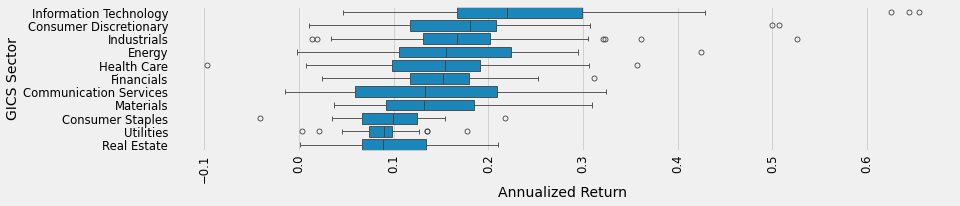

In [68]:
sorted_boxplot(full_data, 'GICS Sector', 'Annualized Return')

**Stock Selection 3**

Eliminating the top 3 underperforming sectors

* Sector Excluded = 'Utilities', 'Real Estate', 'Consumer Staples'
* Number of portfolios = 4
* Stock selection = Top 30 securities in terms of social, governance, environment, total ESG Score

Portfolio Names:
* socialScore
* governanceScore
* environmentScore
* totalEsg

In [71]:
# Define sector and score lists
sector_list = [s for s in list(set(full_data["GICS Sector"])) if s not in ['Utilities', 'Real Estate', 'Consumer Staples']]
score_list = ['socialScore','governanceScore','environmentScore','totalEsg']
num_of_stocks = 30



# Calculate benchmark portfolio
er_bmk = annualize_rets(rets_monthly, periods_per_year=12)
cov_bmk = rets_monthly.cov()
weights_bmk = equal_weights(len(er_bmk))

return_bmk = (weights_bmk * rets_monthly).sum(axis=1)
wealth_bmk = drawdown(return_bmk)["Wealth"]

# Initialize dictionaries for storing portfolio returns and wealth
return_port = {"bmk": return_bmk}
wealth_port = {"bmk": wealth_bmk}

# Loop through scores to create portfolios
for score in score_list:
    # Filter stocks by sectors and sort by the given score
    stock_selected = (
        full_data[full_data["GICS Sector"].isin(sector_list)]
        .sort_values(score, ascending=False)
        .head(num_of_stocks)
        .index
    )

    # Calculate portfolio returns and wealth
    er_port = annualize_rets(rets_monthly[stock_selected], periods_per_year=12)
    cov_port = rets_monthly[stock_selected].cov()
    weights_port = equal_weights(len(er_port))

    return_ = (weights_port * rets_monthly[stock_selected]).sum(axis=1)
    wealth_ = drawdown(return_)["Wealth"]

    # Store results
    return_port[score] = return_
    wealth_port[score] = wealth_


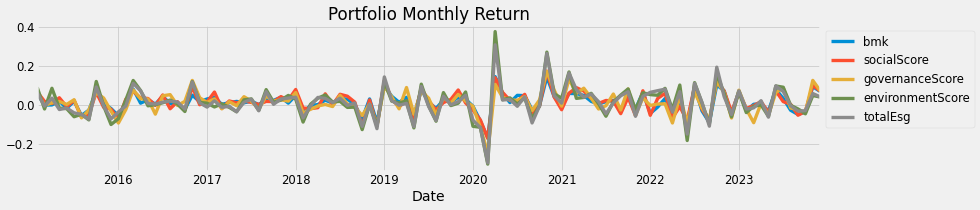

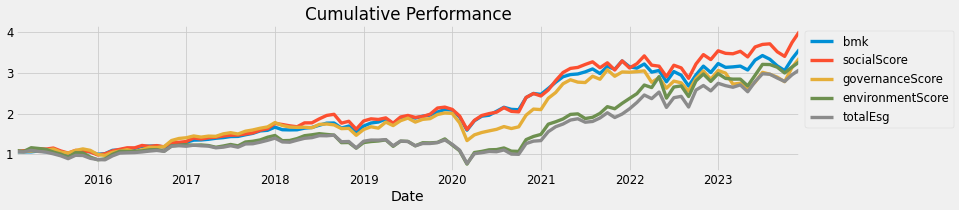

In [72]:
# Convert return and wealth data to DataFrames
return_port = pd.DataFrame(return_port)
wealth_port = pd.DataFrame(wealth_port)

# Plot portfolio monthly returns
return_port.plot(title="Portfolio Monthly Return").legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Plot cumulative performance
wealth_port.plot(title="Cumulative Performance").legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


In [73]:
# Generate summary statistics
summary = summary_stats(return_port, riskfree_rate=RISK_FREE_RATE, periods_per_year=PERIODS_PER_YEAR)
summary = summary.sort_values("Sharpe Ratio", ascending=False)
print(summary)


                  Annualized Return  Annualized Volatility  Sharpe Ratio
bmk               0.158190           0.170435               0.851878    
socialScore       0.175030           0.191503               0.846098    
governanceScore   0.158647           0.208054               0.700046    
environmentScore  0.173949           0.286857               0.561077    
totalEsg          0.161746           0.266462               0.558224    


**Stock Selection 4**

A native sector selection based on observation from the pairs plot. Financials and Health Care have high governance and social score with average annualised returns and volatility.

* Sector = 'Financials', 'Health Care'
* Number of portfolios = 4
* Stock selection = Top 30 securities in terms of social, governance, environment, total ESG Score

Portfolio Names:
* socialScore
* governanceScore
* environmentScore
* totalEsg

In [75]:
# Define sector and score lists
sector_list = ['Financials', 'Health Care']
score_list = ['socialScore', 'governanceScore', 'environmentScore', 'totalEsg']
num_of_stocks = 30

# Calculate benchmark portfolio
er_bmk = annualize_rets(rets_monthly, periods_per_year=12)
cov_bmk = rets_monthly.cov()
weights_bmk = equal_weights(len(er_bmk))

return_bmk = (weights_bmk * rets_monthly).sum(axis=1)
wealth_bmk = drawdown(return_bmk)["Wealth"]

# Initialize dictionaries for storing portfolio returns and wealth
return_port = {"bmk": return_bmk}
wealth_port = {"bmk": wealth_bmk}

# Loop through scores to create portfolios
for score in score_list:
    # Filter stocks by sectors and sort by the given score
    stock_selected = (
        full_data[full_data["GICS Sector"].isin(sector_list)]
        .sort_values(score, ascending=False)
        .head(num_of_stocks)
        .index
    )

    # Calculate portfolio returns and wealth
    er_port = annualize_rets(rets_monthly[stock_selected], periods_per_year=12)
    cov_port = rets_monthly[stock_selected].cov()
    weights_port = equal_weights(len(er_port))

    return_ = (weights_port * rets_monthly[stock_selected]).sum(axis=1)
    wealth_ = drawdown(return_)["Wealth"]

    # Store results
    return_port[score] = return_
    wealth_port[score] = wealth_



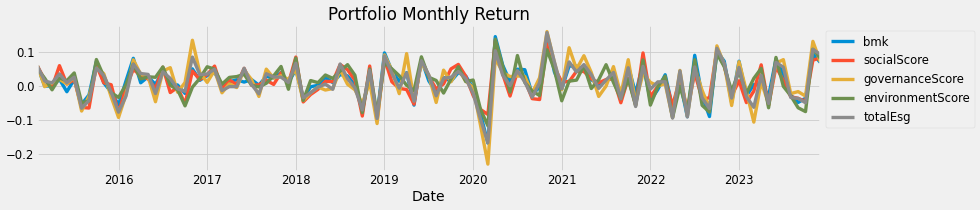

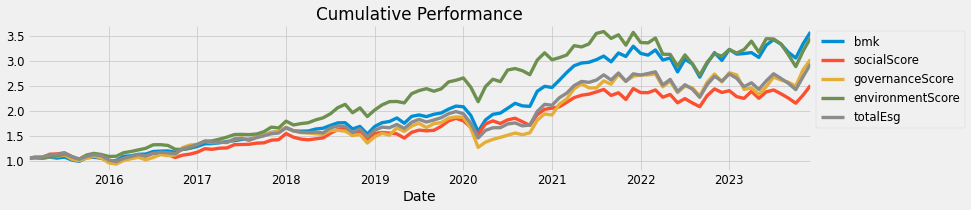

In [76]:
# Convert return and wealth data to DataFrames
return_port = pd.DataFrame(return_port)
wealth_port = pd.DataFrame(wealth_port)

# Plot portfolio monthly returns
return_port.plot(title="Portfolio Monthly Return").legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Plot cumulative performance
wealth_port.plot(title="Cumulative Performance").legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


In [77]:
# Generate summary statistics
summary = summary_stats(return_port, riskfree_rate=RISK_FREE_RATE, periods_per_year=PERIODS_PER_YEAR)
summary = summary.sort_values("Sharpe Ratio", ascending=False)
print(summary)


                  Annualized Return  Annualized Volatility  Sharpe Ratio
bmk               0.158190           0.170435               0.851878    
environmentScore  0.154525           0.171124               0.827033    
totalEsg          0.137733           0.180427               0.691320    
governanceScore   0.145648           0.202793               0.654107    
socialScore       0.117016           0.164495               0.632336    
